### Practice 1

This is a practice to determine what is correlated with the concentration of CO in the air and to create regression models using the found correlations. **Note that correlation does not necessarily mean causation.** The data set shows the observations of an air quality sensor, located in a polluted Italian city from March 2004 to February 2005. I somewhat "created" this practice, you can also use it to find different correlations or follow my steps to apply regression.

Info about the data set:
- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Ã‚Â°C 
- 13 Relative Humidity (%) 
- 14 AH Absolute Humidity

In [1]:
# Reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AirQualityUCI.csv", delimiter=";")
df = df[["Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", 
        "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [3]:
# Dropping null parts
df = df.dropna()
df.shape

(9357, 15)

In [4]:
# Converting strings to numeric

df["CO(GT)"] = df["CO(GT)"].apply(lambda x: x.replace(",", ".")).astype(float)
df["C6H6(GT)"] = df["C6H6(GT)"].apply(lambda x: x.replace(",", ".")).astype(float)
df["T"] = df["T"].apply(lambda x: x.replace(",", ".")).astype(float)
df["RH"] = df["RH"].apply(lambda x: x.replace(",", ".")).astype(float)
df["AH"] = df["AH"].apply(lambda x: x.replace(",", ".")).astype(float)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [6]:
# Seeing there are some unusual values
df = df.loc[df["T"] != -200]
df = df.loc[df["CO(GT)"] != -200]
df = df.loc[df["NMHC(GT)"] != -200]
df = df.loc[df["NOx(GT)"] != -200]
df = df.loc[df["NO2(GT)"] != -200]
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,2.353567,1207.879081,231.025393,10.771100,966.116082,143.501814,963.297461,100.259976,1600.620314,1045.812576,15.601451,49.050181,0.831853
std,1.409496,241.816997,208.461912,7.418134,266.424557,81.829717,265.914168,31.493823,302.291793,400.134662,4.825304,15.266746,0.178506
min,0.300000,753.000000,7.000000,0.500000,448.000000,12.000000,461.000000,19.000000,955.000000,263.000000,6.300000,14.900000,0.402300
25%,1.300000,1017.000000,77.000000,4.800000,754.000000,81.000000,769.000000,78.500000,1369.500000,760.000000,11.900000,36.700000,0.718950
50%,2.000000,1172.000000,157.000000,9.100000,944.000000,128.000000,920.000000,99.000000,1556.000000,1009.000000,15.000000,49.600000,0.817700
75%,3.100000,1380.000000,318.500000,14.800000,1142.500000,187.000000,1131.000000,122.000000,1783.500000,1320.000000,18.300000,60.550000,0.927500
max,8.100000,2040.000000,1189.000000,39.200000,1754.000000,478.000000,1935.000000,196.000000,2679.000000,2359.000000,30.000000,83.200000,1.485200


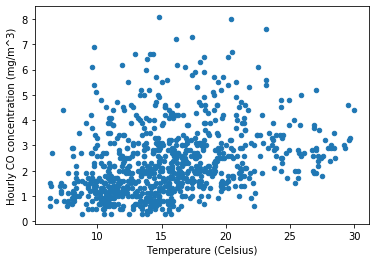

In [7]:
# After some data cleaning, let's plot temperature against CO concentration

df.plot(kind="scatter", x="T", y="CO(GT)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

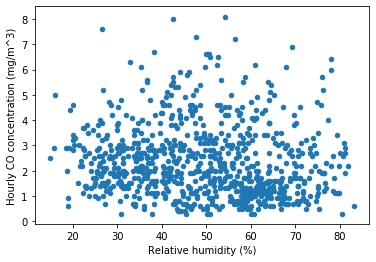

In [8]:
# Relative humidity against CO concentration

df.plot(kind="scatter", x="RH", y="CO(GT)")
plt.xlabel("Relative humidity (%)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

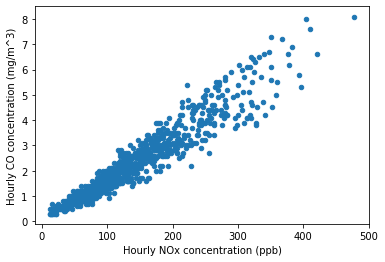

In [9]:
# NOx concentration against CO concentration

df.plot(kind="scatter", x="NOx(GT)", y="CO(GT)")
plt.xlabel("Hourly NOx concentration (ppb)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

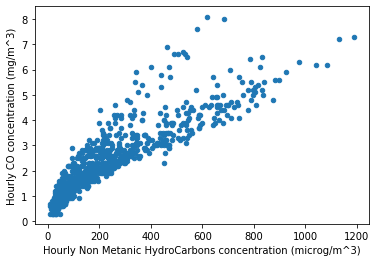

In [10]:
# As expected, the previous graph yielded to a linear result since NOx gases are another actors of air pollution
# Now let's see Non Metanic HydroCarbons concentration in microg/m^3 against CO concentration

# Non Metanic HC against CO concentration

df.plot(kind="scatter", x="NMHC(GT)", y="CO(GT)")
plt.xlabel("Hourly Non Metanic HydroCarbons concentration (microg/m^3)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

Using our EDA, we know that Non Metanic HC Concentration and NOx concentration are correlated with CO concentration.
We will now apply these two regression models and see which one is more accurate
- Simple Linear Regression: [NOx] and [CO] ([] indicate concentration in chemistry)
- Polynomial Regression: [NMHC] and [CO]

In [11]:
### Simple linear regression: [NOx] and [CO] ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X: df["NOx(GT)"]
# y: df["CO(GT)"]

# Train-test split
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

train_x = np.asanyarray(train[["NOx(GT)"]])
train_y = np.asanyarray(train[["CO(GT)"]])

test_x = np.asanyarray(test[["NOx(GT)"]])
test_y = np.asanyarray(test[["CO(GT)"]])

# Fitting the data 
clf = LinearRegression()
trained_clf = clf.fit(train_x, train_y)

# Linear equation
coefficient = clf.coef_[0][0]
intercept = clf.intercept_[0]
print("Coefficient", coefficient)
print("Intercept", intercept)
print("The line: Y = {} + {}x".format(round(intercept, 4), round(coefficient, 4)))

Coefficient 0.016209525856380892
Intercept 0.027088595059354237
The line: Y = 0.0271 + 0.0162x


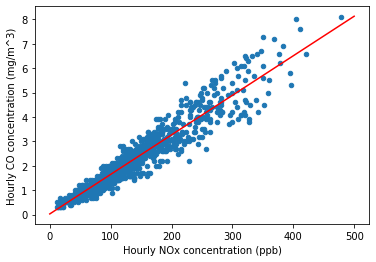

In [12]:
# Visualization of the regression line

df.plot(kind="scatter", x="NOx(GT)", y="CO(GT)")
XX = np.arange(0.0, 600.0, 100.0)
yy = intercept + coefficient * XX # Creating the line
plt.plot(XX, yy, "-r")
plt.xlabel("Hourly NOx concentration (ppb)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

In [13]:
# Evaluation of our Simple Linear Regression model
from sklearn.metrics import r2_score

predicted = clf.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted - test_y) ** 2))
print("R2-score: %.2f" % r2_score(predicted , test_y))

Mean absolute error: 0.37
Residual sum of squares (MSE): 0.24
R2-score: 0.89


**This shows that by using the %20 of our data as the test set, we managed to achieve %89 accuracy with our simple linear regression model. Our model used the hourly NOx concentration to predict hourly CO concentration in the air.**

In [14]:
### Polynomial Regression: [NMHC] and [CO] ###
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["NMHC(GT)"]])
train_y = np.asanyarray(train[["CO(GT)"]])

test_x = np.asanyarray(test[["NMHC(GT)"]])
test_y = np.asanyarray(test[["CO(GT)"]])

# We will try a second degree polynomial
pf = PolynomialFeatures(degree=2)
train_x_poly = pf.fit_transform(train_x)

In [15]:
clf = LinearRegression()
trained = clf.fit(train_x_poly, train_y)

# Coefficients and the intercept
print("Coefficients", clf.coef_)
print("Intercept", clf.intercept_)

Coefficients [[ 0.00000000e+00  8.48310951e-03 -3.40266166e-06]]
Intercept [0.69682864]


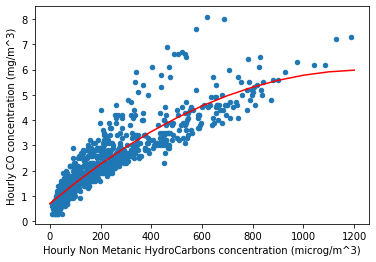

In [16]:
# Visualizing the Polynomial Regression degree 2.

df.plot(kind="scatter", x="NMHC(GT)", y="CO(GT)")
XX = np.arange(0.0, 1300.0, 100.0)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2) # Creating the polynomial
plt.plot(XX, yy, '-r' )
plt.xlabel("Hourly Non Metanic HydroCarbons concentration (microg/m^3)")
plt.ylabel("Hourly CO concentration (mg/m^3)")
plt.show()

In [17]:
# Evaluation of our Polynomial Regression model

test_x_poly = pf.fit_transform(test_x)
tested = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(tested - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((tested - test_y) ** 2))
print("R2-score: %.2f" % r2_score(tested , test_y))

Mean absolute error: 0.49
Residual sum of squares (MSE): 0.57
R2-score: 0.66


**With the same 80-20 train-test split, our polynomial regression model achieved %66 accuracy by using the hourly Non Metanic HydroCarbon concentration to predict hourly CO concentration in the air.**